In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [4]:
outer_target_group='gender'

output_dir = './output/Meta-Llama-3-8B-Instruct/'
output_file='3_case_study_results'

os.makedirs(output_dir+"images/", exist_ok=True)

files = []
files= [output_dir+"female_1_results_Test_refactored.csv", output_dir+"male_1_results_refactored.csv"]
# files += [output_dir+f"male_{i+1}_results_refactored.csv" for i in range(3)]
# files += [output_dir+f"female_{i+1}_results_refactored.csv" for i in range(3)]
files

['./output/Meta-Llama-3-8B-Instruct/female_1_results_Test_refactored.csv',
 './output/Meta-Llama-3-8B-Instruct/male_1_results_refactored.csv']

In [5]:
all_data = []
for file in files:
    data = pd.read_csv(file,sep='\t', header=0, index_col=False)
    all_data.append(data)
all_data = pd.concat(all_data)

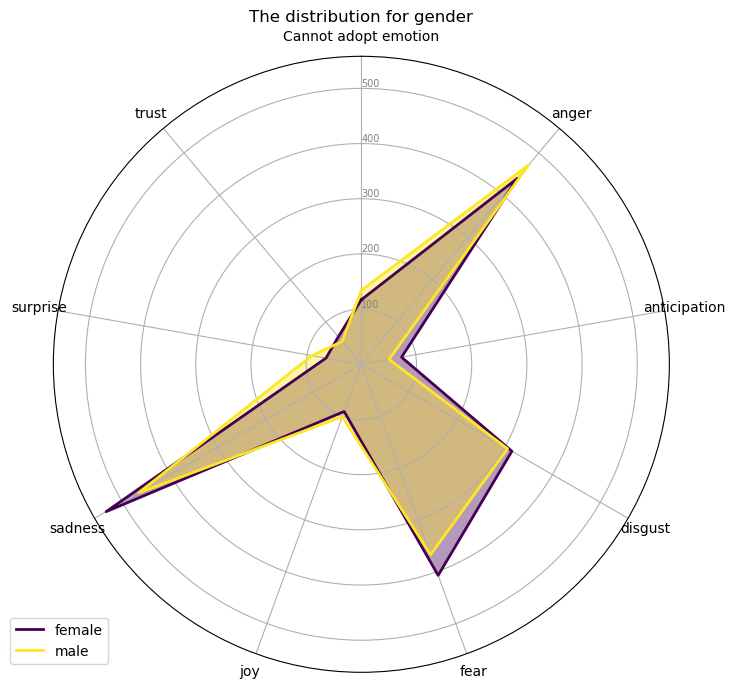

In [6]:
# Grouping by 'target_group' and 'term', and counting occurrences
grouped = all_data.groupby(['target_group', 'AffectCategory']).size().reset_index(name='count')

# Pivot the table for easier plotting
pivot_table = grouped.pivot(index='target_group', columns='AffectCategory', values='count').fillna(0)

# Get the categories (terms)
categories = pivot_table.columns
N = len(categories)

# Create a color map for different target groups
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_table)))

# Create the spider chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw y-labels
ax.set_rlabel_position(0)
plt.yticks(color="grey", size=7)

# Plot each group
for i, (group, row) in enumerate(pivot_table.iterrows()):
    values = row.values.flatten().tolist()
    values += values[:1]
    if len(set(values)) == 1:  # If all values are the same, fill the area with gray
        ax.fill(angles, values, color='grey', alpha=0.4)
    else:
        ax.plot(angles, values, color=colors[i], linewidth=2, linestyle='solid', label=group)
        ax.fill(angles, values, color=colors[i], alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("The distribution for "+outer_target_group)
plt.savefig(output_dir+"/images/"+output_file+"_spider_chart.png")
plt.show()